In [1]:
import pandas as pd
from datetime import datetime

In [2]:
df = pd.read_csv("ProjectTweets.csv",header = None)

In [3]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
columns_names=['index','id','date','flag','user','text']

In [5]:
df.columns = columns_names

In [6]:
# remove PDT 
df['date'] = df['date'].str.replace('PDT', '')

In [7]:
# time format
date_format = '%a %b %d %H:%M:%S %Y'

In [8]:
# column in object 
df['date'] = pd.to_datetime(df['date'], format=date_format)

In [9]:
# date objects
print(df['date'])

0         2009-04-06 22:19:45
1         2009-04-06 22:19:49
2         2009-04-06 22:19:53
3         2009-04-06 22:19:57
4         2009-04-06 22:19:57
                  ...        
1599995   2009-06-16 08:40:49
1599996   2009-06-16 08:40:49
1599997   2009-06-16 08:40:49
1599998   2009-06-16 08:40:49
1599999   2009-06-16 08:40:50
Name: date, Length: 1600000, dtype: datetime64[ns]


In [10]:
df['date'].min()

Timestamp('2009-04-06 22:19:45')

In [11]:
df['date'].max()

Timestamp('2009-06-25 10:28:31')

In [12]:
df['week'] = df['date'].dt.strftime('%U')  # week



In [13]:
df['month'] = df['date'].dt.strftime('%B')  # month

In [14]:
df['day'] = df['date'].dt.strftime('%A')  # day

In [15]:
df['day_num'] = df['date'].dt.dayofyear


In [16]:
df.head()

,index,id,date,flag,user,text,week,month,day,day_num
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96


In [19]:
import nltk
from nltk.tokenize import word_tokenize

In [20]:
def clean_data(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    clean_text = ' '.join(tokens)
    return clean_text


In [21]:
df['cleaned_text'] = df['text'].apply(clean_data)

# sentiment analysis with vader

In [22]:
import nltk

In [23]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/beatricebuttiglione/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in df['cleaned_text']:
    pol_score = sia.polarity_scores(line)
    pol_score['cleaned_text'] = line
    results.append(pol_score)

In [25]:
df1 = pd.DataFrame.from_records(results)
df1.head()

,neg,neu,pos,compound,cleaned_text
0,0.148,0.852,0.000,-0.3818,switchfoot http Awww that a bummer You shoulda...
1,0.295,0.705,0.000,-0.7269,is upset that he ca update his Facebook by tex...
2,0.000,0.824,0.176,0.4939,Kenichan I dived many times for the ball Manag...
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire
4,0.252,0.748,0.000,-0.6597,nationwideclass no it not behaving at all i ma...


In [26]:
df1['label'] = 0
df1.loc[df1['compound'] > 0.2, 'label'] = 1
df1.loc[df1['compound'] < -0.2, 'label'] = -1
df1.head()

,neg,neu,pos,compound,cleaned_text,label
0,0.148,0.852,0.000,-0.3818,switchfoot http Awww that a bummer You shoulda...,-1
1,0.295,0.705,0.000,-0.7269,is upset that he ca update his Facebook by tex...,-1
2,0.000,0.824,0.176,0.4939,Kenichan I dived many times for the ball Manag...,1
3,0.321,0.500,0.179,-0.2500,my whole body feels itchy and like its on fire,-1
4,0.252,0.748,0.000,-0.6597,nationwideclass no it not behaving at all i ma...,-1


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

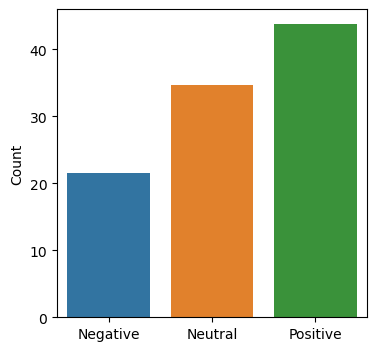

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df1.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

In [30]:
merged_df = pd.merge(df, df1, on="cleaned_text", how="inner")

In [31]:
merged_df.head()

,index,id,date,flag,user,text,week,month,day,day_num,cleaned_text,neg,neu,pos,compound,label
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96,switchfoot http Awww that a bummer You shoulda...,0.148,0.852,0.000,-0.3818,-1
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96,is upset that he ca update his Facebook by tex...,0.295,0.705,0.000,-0.7269,-1
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96,Kenichan I dived many times for the ball Manag...,0.000,0.824,0.176,0.4939,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96,my whole body feels itchy and like its on fire,0.321,0.500,0.179,-0.2500,-1
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96,nationwideclass no it not behaving at all i ma...,0.252,0.748,0.000,-0.6597,-1


# sentiment analysis with textblob

In [33]:
from textblob import TextBlob

In [32]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    sentiment_score = analysis.sentiment.polarity
    return float(sentiment_score)

In [34]:
df['sentiment_score'] = df['cleaned_text'].apply(analyze_sentiment)

In [36]:
df['label_blob'] = 0
df.loc[df['sentiment_score'] > 0.2, 'label_blob'] = 1
df.loc[df['sentiment_score'] < -0.2, 'label_blob'] = -1
df.head()

,index,id,date,flag,user,text,week,month,day,day_num,cleaned_text,sentiment_score,label_blob
0,0,1467810369,2009-04-06 22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",14,April,Monday,96,switchfoot http Awww that a bummer You shoulda...,0.200,0
1,1,1467810672,2009-04-06 22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,14,April,Monday,96,is upset that he ca update his Facebook by tex...,0.000,0
2,2,1467810917,2009-04-06 22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,14,April,Monday,96,Kenichan I dived many times for the ball Manag...,0.500,1
3,3,1467811184,2009-04-06 22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,14,April,Monday,96,my whole body feels itchy and like its on fire,0.200,0
4,4,1467811193,2009-04-06 22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",14,April,Monday,96,nationwideclass no it not behaving at all i ma...,-0.625,-1


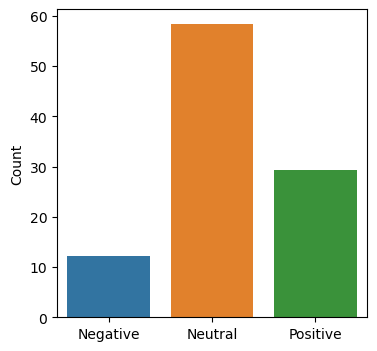

In [37]:
fig, ax = plt.subplots(figsize=(4, 4))

counts = df.label_blob.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Count")

plt.show()

# forecsting models data preparation

In [38]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

In [39]:
merged_df['solo_data'] = merged_df['date'].dt.date

In [49]:
grouped_df = merged_df.groupby('solo_data')['compound'].mean().reset_index()


In [63]:
grouped_df = grouped_df.dropna()

In [67]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 7 to 47
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  41 non-null     datetime64[ns]
 1   compound   41 non-null     float64       
 2   day_num    41 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.3 KB


In [51]:
grouped_df['solo_data'] = pd.to_datetime(grouped_df1['solo_data'], format='%Y-%m-%d')

In [52]:
grouped_df['day_num'] = grouped_df['solo_data'].dt.dayofyear

In [55]:
grouped_df1 = grouped_df1[grouped_df1['solo_data'].dt.month >= 5]

In [56]:
plt.figure(figsize=(10, 6))  # chart


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

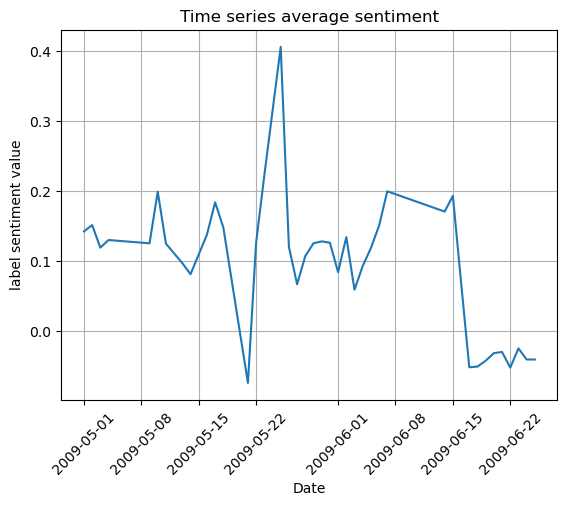

In [65]:
plt.plot(grouped_df1['solo_data'], grouped_df1['compound'])  
plt.title('Time series average sentiment')  
plt.xlabel('Date')  
plt.ylabel('label sentiment value')  
plt.grid(True) 
plt.xticks(rotation=45)
plt.show()  

In [37]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [68]:
from statsmodels.tsa.stattools import adfuller



# test ADF
result = adfuller(grouped_df1['compound'])

adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]


if p_value < 0.05:
    print("time series is stationary (Ho rejected)")
else:
    print("time series is not stationary (H1 accepted)")




time series is not stationary (H1 accepted)


In [69]:
test_set_start_index = len(grouped_df1) - 7

# split dataset into training and test set
train_set = grouped_df1.iloc[:test_set_start_index]
test_set = grouped_df1.iloc[test_set_start_index:]

In [70]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 41 to 47
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  7 non-null      datetime64[ns]
 1   compound   7 non-null      float64       
 2   label      7 non-null      int64         
 3   day_num    7 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 280.0 bytes


In [71]:
train_set.head(2)

,solo_data,compound,label,day_num
7,2009-05-01,0.142733,0,121
8,2009-05-02,0.151726,0,122


In [72]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [73]:
print(grouped_df1['compound'].dtype)


float64


In [74]:
import numpy as np
from scipy.interpolate import CubicSpline


In [75]:
dates = np.array(grouped_df1['solo_data'])  


In [76]:
values = np.array(grouped_df1['compound'])  

In [77]:
numeric_dates = np.arange(len(dates))


In [78]:
cubic_interp = CubicSpline(numeric_dates, values)


In [79]:
date_min = min(grouped_df1['solo_data'])
date_max = max(grouped_df1['solo_data'])

In [80]:
list_dates = grouped_df1['solo_data'].tolist()

In [81]:
from datetime import datetime, timedelta

delta = date_max - date_min

# Crea una lista di date nel periodo
date_list = [date_min + timedelta(days=i) for i in range(delta.days + 1)]

# Stampa la lista di date
print(date_list)


[Timestamp('2009-05-01 00:00:00'), Timestamp('2009-05-02 00:00:00'), Timestamp('2009-05-03 00:00:00'), Timestamp('2009-05-04 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-05-09 00:00:00'), Timestamp('2009-05-10 00:00:00'), Timestamp('2009-05-11 00:00:00'), Timestamp('2009-05-12 00:00:00'), Timestamp('2009-05-13 00:00:00'), Timestamp('2009-05-14 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-05-16 00:00:00'), Timestamp('2009-05-17 00:00:00'), Timestamp('2009-05-18 00:00:00'), Timestamp('2009-05-19 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-05-21 00:00:00'), Timestamp('2009-05-22 00:00:00'), Timestamp('2009-05-23 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-25 00:00:00'), Timestamp('2009-05-26 00:00:00'), Timestamp('2009-05-27 00:00:00'), Timestamp('2009-05-28 00:00:00'), Timestamp('2009-05-29 00:00:00'), Timestamp('20

In [82]:
list_dates

[Timestamp('2009-05-01 00:00:00'),
 Timestamp('2009-05-02 00:00:00'),
 Timestamp('2009-05-03 00:00:00'),
 Timestamp('2009-05-04 00:00:00'),
 Timestamp('2009-05-09 00:00:00'),
 Timestamp('2009-05-10 00:00:00'),
 Timestamp('2009-05-11 00:00:00'),
 Timestamp('2009-05-13 00:00:00'),
 Timestamp('2009-05-14 00:00:00'),
 Timestamp('2009-05-16 00:00:00'),
 Timestamp('2009-05-17 00:00:00'),
 Timestamp('2009-05-18 00:00:00'),
 Timestamp('2009-05-21 00:00:00'),
 Timestamp('2009-05-22 00:00:00'),
 Timestamp('2009-05-23 00:00:00'),
 Timestamp('2009-05-25 00:00:00'),
 Timestamp('2009-05-26 00:00:00'),
 Timestamp('2009-05-27 00:00:00'),
 Timestamp('2009-05-28 00:00:00'),
 Timestamp('2009-05-29 00:00:00'),
 Timestamp('2009-05-30 00:00:00'),
 Timestamp('2009-05-31 00:00:00'),
 Timestamp('2009-06-01 00:00:00'),
 Timestamp('2009-06-02 00:00:00'),
 Timestamp('2009-06-03 00:00:00'),
 Timestamp('2009-06-04 00:00:00'),
 Timestamp('2009-06-05 00:00:00'),
 Timestamp('2009-06-06 00:00:00'),
 Timestamp('2009-06-

In [83]:
valori_mancanti = list(set(date_list) - set(list_dates))

print(valori_mancanti)

[Timestamp('2009-05-12 00:00:00'), Timestamp('2009-05-06 00:00:00'), Timestamp('2009-06-11 00:00:00'), Timestamp('2009-06-08 00:00:00'), Timestamp('2009-05-08 00:00:00'), Timestamp('2009-06-13 00:00:00'), Timestamp('2009-05-15 00:00:00'), Timestamp('2009-06-09 00:00:00'), Timestamp('2009-05-20 00:00:00'), Timestamp('2009-05-07 00:00:00'), Timestamp('2009-06-10 00:00:00'), Timestamp('2009-06-12 00:00:00'), Timestamp('2009-05-05 00:00:00'), Timestamp('2009-05-24 00:00:00'), Timestamp('2009-05-19 00:00:00')]


In [84]:
df5 = pd.DataFrame({'solo_data': valori_mancanti})


In [85]:
df5['compound']= ' '

In [86]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  15 non-null     datetime64[ns]
 1   compound   15 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 368.0+ bytes


In [87]:
df5['solo_data'] = pd.to_datetime(df5['solo_data'])

In [88]:
df5 = df5.sort_values(by='solo_data')

In [89]:
grouped_df1

,solo_data,compound,label,day_num
7,2009-05-01,0.142733,0,121
8,2009-05-02,0.151726,0,122
9,2009-05-03,0.119554,0,123
10,2009-05-04,0.130434,0,124
11,2009-05-09,0.125734,0,129
12,2009-05-10,0.199443,0,130
13,2009-05-11,0.125295,0,131
14,2009-05-13,0.097390,0,133
15,2009-05-14,0.081554,0,134
16,2009-05-16,0.138032,0,136


In [90]:
df5['compound'].replace(' ', pd.NA, inplace=True)

In [91]:
df_concatenato = pd.concat([grouped_df1, df5], axis=0)

In [92]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 7 to 5
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   41 non-null     float64       
 2   label      41 non-null     float64       
 3   day_num    41 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 2.2 KB


In [93]:
df_concatenato['solo_data'] = pd.to_datetime(df_concatenato['solo_data'])

In [94]:
df_concatenato['day_num'] = df_concatenato['solo_data'].dt.dayofyear

In [95]:
df_concatenato = df_concatenato.sort_values(by='solo_data')

In [96]:
df_concatenato.sort_values(by="solo_data", inplace=True)



In [97]:
df_concatenato['compound'] = df_concatenato['compound'].replace(' ', np.nan)



In [98]:
df_concatenato["label"].fillna(method='ffill', inplace=True)

In [100]:
df_concatenato["compound"].fillna(method='ffill', inplace=True) # Applica il Forward Fill alla colonna "compound"

In [101]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 7 to 47
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   solo_data  56 non-null     datetime64[ns]
 1   compound   56 non-null     float64       
 2   label      56 non-null     float64       
 3   day_num    56 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 2.2 KB


In [102]:

df_concatenato = df_concatenato.set_index('solo_data')

In [103]:
from sklearn.preprocessing import MinMaxScaler

In [104]:
scaler = MinMaxScaler()


In [105]:
df_concatenato['compound'] = df_concatenato['compound'].astype(float)

In [106]:
df_concatenato['compound'] = scaler.fit_transform(df_concatenato['compound'].values.reshape(-1, 1))

In [107]:
df_concatenato.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56 entries, 2009-05-01 to 2009-06-25
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   compound  56 non-null     float64
 1   label     56 non-null     float64
 2   day_num   56 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [108]:
test_set_start_index = len(df_concatenato) - 7

# split dataset into training and test set
train_set = df_concatenato.iloc[:test_set_start_index]
test_set= df_concatenato.iloc[test_set_start_index:]

In [109]:
test_set

,compound,label,day_num
solo_data,,,
2009-06-19,0.065994,0.0,170
2009-06-20,0.088672,0.0,171
2009-06-21,0.092188,0.0,172
2009-06-22,0.045541,0.0,173
2009-06-23,0.102748,0.0,174
2009-06-24,0.069815,0.0,175
2009-06-25,0.069641,0.0,176


# arima

In [110]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import GridSearchCV



In [112]:
from pmdarima import auto_arima


p_values = range(0, 3)  # Range per p
d_values = range(0, 3)  # Range per d
q_values = range(0, 3)  # Range per q

# grid search using auto_arima
grid_search =  auto_arima(train_set['compound'], 
                        start_p=min(p_values),
                        start_d=min(d_values),
                        start_q=min(q_values),
                        max_p=max(p_values),
                        max_d=max(d_values),
                        max_q=max(q_values),
                        seasonal=False,  # ARIMA non stagionale
                        stepwise=True,  # Esecuzione passo-passo
                        suppress_warnings=True,  # Nascondi avvisi
                        error_action="ignore",  # Ignora errori
                        trace=True)  # Mostra il percorso della ricerca




Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=65.402, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-36.073, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=20.650, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-35.899, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-36.388, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-46.316, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-47.926, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-39.563, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-46.042, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-47.928, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-46.514, Time=0.04 sec


In [118]:
# Inizializza il modello ARIMA
model = ARIMA(train_set["compound"], order=(1, 0, 0))


/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [115]:
# Addestra il modello
model_fit = model.fit()



In [116]:
predictions = model_fit.forecast(7)

In [117]:
predictions

2009-06-19    0.253407
2009-06-20    0.347918
2009-06-21    0.391558
2009-06-22    0.411708
2009-06-23    0.421013
2009-06-24    0.425309
2009-06-25    0.427293
Freq: D, Name: predicted_mean, dtype: float64

In [121]:
test_set

,compound,label,day_num
solo_data,,,
2009-06-19,0.065994,0.0,170
2009-06-20,0.088672,0.0,171
2009-06-21,0.092188,0.0,172
2009-06-22,0.045541,0.0,173
2009-06-23,0.102748,0.0,174
2009-06-24,0.069815,0.0,175
2009-06-25,0.069641,0.0,176


In [119]:
import matplotlib.pyplot as plt


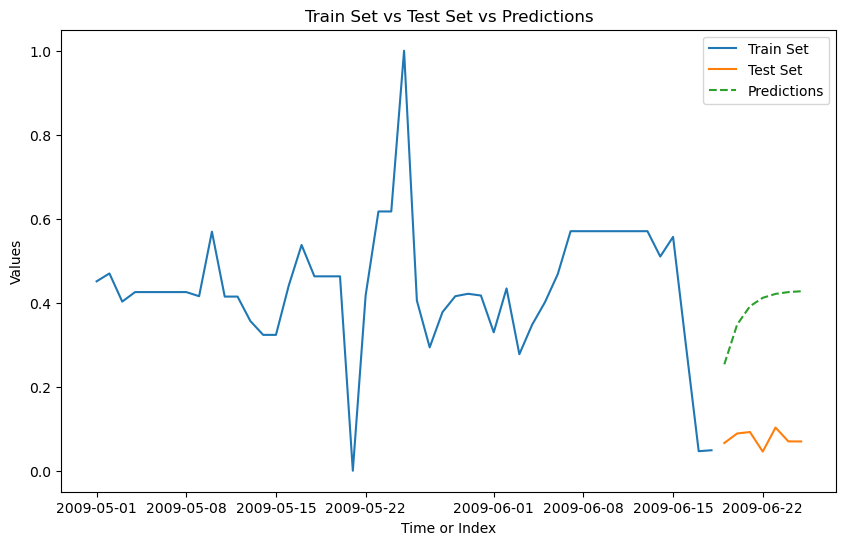

In [122]:
plt.figure(figsize=(10,6))

# plot train set vs test set and vs predicted values
plt.plot(train_set['compound'], label='Train Set')
plt.plot(test_set['compound'], label='Test Set')
plt.plot(predictions, label='Predictions', linestyle='--')

# titles and labels
plt.title('Train Set vs Test Set vs Predictions')
plt.xlabel('Time or Index')
plt.ylabel('Values')


plt.legend()
plt.show()


# rnn

In [124]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split


2023-11-10 22:30:07.562798: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [125]:
training_data = np.array(train_set)

In [126]:
x_training_data = []

y_training_data =[]

In [127]:
for i in range(20, len(training_data)):
    x_training_data.append(training_data[i-20:i, 0])
    y_training_data.append(training_data[i, 0])

In [128]:
x_training_data = np.array(x_training_data)

y_training_data = np.array(y_training_data)

In [129]:
print(x_training_data.shape)

print(y_training_data.shape)

(29, 20)
(29,)


In [130]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], 

                                               x_training_data.shape[1], 

                                               1))

In [131]:
print(x_training_data.shape)

(29, 20, 1)


In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [133]:
rnn = Sequential()

In [134]:
rnn.add(LSTM(units = 45, return_sequences = True, input_shape = (x_training_data.shape[1], 1)))

In [135]:
rnn.add(Dropout(0.2))

In [136]:
rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45, return_sequences = True))

rnn.add(Dropout(0.2))

rnn.add(LSTM(units = 45))

rnn.add(Dropout(0.2))

In [137]:
rnn.add(Dense(units = 1))

In [138]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [139]:
rnn.fit(x_training_data, y_training_data, epochs = 100, batch_size = 32)

Epoch 1/100
1/1 [==============================] - 9s 9s/step - loss: 0.2270
Epoch 2/100
1/1 [==============================] - 0s 53ms/step - loss: 0.2003
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 0.1746
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 0.1434
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1171
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0893
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0673
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0494
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 0.0522
Epoch 10/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0766
Epoch 11/100
1/1 [==============================] - 0s 28ms/step - loss: 0.0588
Epoch 12/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0589
Epoch 13/100
1/1 [==============================] -

In [141]:
predictions = rnn.predict(test_set['compound'])

1/1 [==============================] - 1s 1s/step


In [142]:
predictions

array([[0.05042227],
       [0.05043596],
       [0.05043809],
       [0.05040989],
       [0.05044445],
       [0.05042458],
       [0.05042447]], dtype=float32)

# SVR

In [147]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



In [148]:
model = SVR()



In [150]:
df_concatenato.head()

,compound,label,day_num
solo_data,,,
2009-05-01,0.450950,0.0,121
2009-05-02,0.469690,0.0,122
2009-05-03,0.402645,0.0,123
2009-05-04,0.425319,0.0,124
2009-05-05,0.425319,0.0,125


In [155]:
X = df_concatenato[['day_num']]  
y = df_concatenato['compound']  

In [156]:
# Ssplit dataset in training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [157]:
# train model
model.fit(X_train, y_train)



SVR()

In [158]:
# predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)



In [159]:
# (MSE) for both training and testing data
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)


In [160]:

# print MSE values
print("MSE training data:", mse_train)
print("MSE testing data:", mse_test)



MSE training data: 0.020707463935710074
MSE testing data: 0.012601867525328827


In [161]:
# Confrontiamo i due valori per valutare la presenza di overfitting
if mse_test > mse_train:
    print("Potrebbe esserci overfitting.")
else:
    print("Non sembra esserci overfitting.")

Non sembra esserci overfitting.


In [162]:
new_data=np.array([200])

In [163]:
new_data = new_data.reshape(1, -1)

In [ ]:
values_for_svr = test_set['day_num'].values

In [ ]:
values_for_svr= ([[170],
       [171],
       [172],
       [173],
       [174],
       [175],
       [176]])


In [179]:
predicted_values = model.predict(values_for_svr)


/Users/beatricebuttiglione/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning:

X does not have valid feature names, but SVR was fitted with feature names



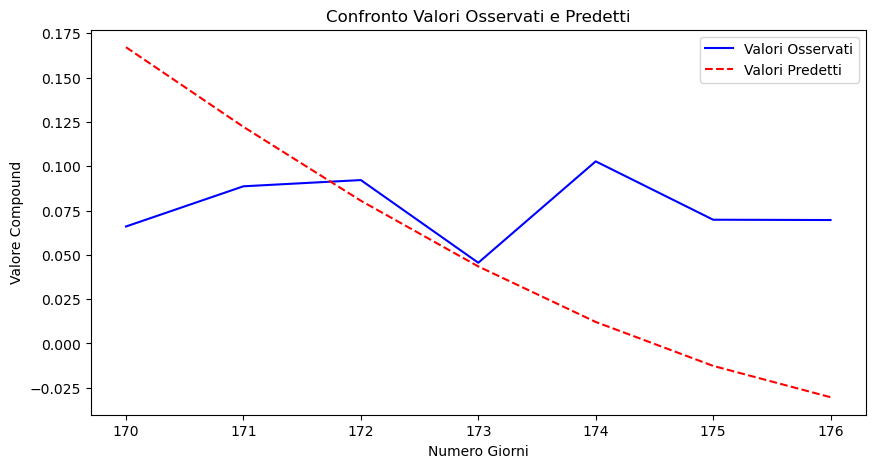

In [183]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5)) 

plt.plot(test_set['day_num'], test_set['compound'], label='Valori Osservati', color='blue')


plt.plot(test_set['day_num'], predicted_values, label='Valori Predetti', color='red', linestyle='--')

plt.title('Confronto Valori Osservati e Predetti')
plt.xlabel('Numero Giorni')
plt.ylabel('Valore Compound')

plt.legend()

plt.show()


In [181]:
test_set

,compound,label,day_num
solo_data,,,
2009-06-19,0.065994,0.0,170
2009-06-20,0.088672,0.0,171
2009-06-21,0.092188,0.0,172
2009-06-22,0.045541,0.0,173
2009-06-23,0.102748,0.0,174
2009-06-24,0.069815,0.0,175
2009-06-25,0.069641,0.0,176


In [185]:
df_concatenato.to_csv("test.csv")

# Dashboard

In [167]:
df = df_concatenato.reset_index()

In [168]:
df.head()

,solo_data,compound,label,day_num
0,2009-05-01,0.450950,0.0,121
1,2009-05-02,0.469690,0.0,122
2,2009-05-03,0.402645,0.0,123
3,2009-05-04,0.425319,0.0,124
4,2009-05-05,0.425319,0.0,125


In [184]:

from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import dash
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px


app = Dash(__name__)

# layout 
app.layout = html.Div([
    dcc.Graph(id='time-series-chart'),
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=df['solo_data'].min(),
        end_date=pd.to_datetime('2009-09-30'),  # Impostare la data di fine su 30 settembre 2009
        display_format='YYYY-MM-DD'
    )
])

# ARIMA
def predict_with_arima(train_set, start_date, end_date):
    
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    # num days for prediction
    forecast_period = (end_date - train_set['solo_data'].max()).days
    if forecast_period <= 0:
        return train_set  

    
    p_values = range(0, 3)
    d_values = range(0, 3)
    q_values = range(0, 3)

    # grid search
    grid_search = auto_arima(train_set['compound'], 
                         start_p=min(p_values),
                         start_d=min(d_values),
                         start_q=min(q_values),
                         max_p=max(p_values),
                         max_d=max(d_values),
                         max_q=max(q_values),
                         seasonal=False,
                         stepwise=True,
                         suppress_warnings=True,
                         error_action="ignore",
                         trace=True)
    
    
    p, d, q = grid_search.order
    
    model = ARIMA(train_set['compound'], order=(p, d, q))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=forecast_period)

    
    future_dates = [train_set['solo_data'].max() + timedelta(days=x) for x in range(1, forecast_period + 1)]
    forecast_df = pd.DataFrame({
        'solo_data': future_dates,
        'compound': forecast
    })

    
    train_set = pd.concat([train_set, forecast_df], ignore_index=True)
    return train_set

# Callback 
@app.callback(
    Output('time-series-chart', 'figure'),
    [Input('date-picker-range', 'start_date'),
     Input('date-picker-range', 'end_date')]
)
def update_graph(start_date, end_date):
    
    dff = df_concatenato[(df_concatenato['solo_data'] >= start_date) & (df_concatenato['solo_data'] <= end_date)]
    dff = predict_with_arima(dff, start_date, end_date)  # Aggiungi la previsione al dataframe

    
    fig = px.line(dff, x='solo_data', y='compound', title='Andamento Temporale')

    return fig


if __name__ == '__main__':
    app.run_server(port=8064, debug=False)


Dash is running on http://127.0.0.1:8064/

 * Serving Flask app '__main__'
 * Debug mode: off


Address already in use
Port 8064 is in use by another program. Either identify and stop that program, or start the server with a different port.


AssertionError: 